In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import math

In [26]:
import sys 
import os
sys.path.append(os.path.abspath("../agents/"))
from world import World 

### The "Base" agent 
The base class can take three new parameters:

"prediction", --> sigmoid, chaos

"behavior", --> sigmoid, chaos

and "attention" --> static, entropy

"Sigmoid" updates update the behavioral priors or predictions proportionally to the error signal along a sigmoid curve centered at the previous prior or prediction. "Chaos" updates take the raw error values and update the behavioral priors and predictions randomly (positively or negatively) based on the magnitude of the error.

Attention filters error signals that are incorporated into updates not at all ("static"), or via "entropy" discounting information that is suspected to have come from an (uncertain) prior close to 0.5.

#### Chaos
To start, here is a purely chaotic agent.

In [27]:
world = World(state_size =50, time =500, agent=["base", "base"], seed=7, prediction=["chaos", "chaos"], behavior=["chaos", "chaos"], attention=["static", "static"])

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

#world.print_results()
time = [t for t in range(len(costs[0]))]

#### Metrics
Error reflects the average true error signal across features. Costs, which may be lowered by attention filters, are the same as error in this first example. Predictability reflects the degree to which behavioral priors are generally moving away from 0.5 and towards 0 or 1, making them more predictable.

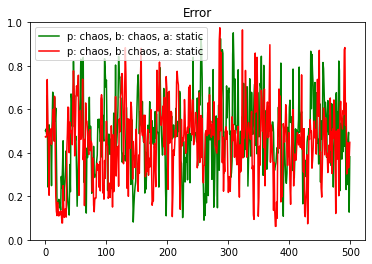

In [28]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

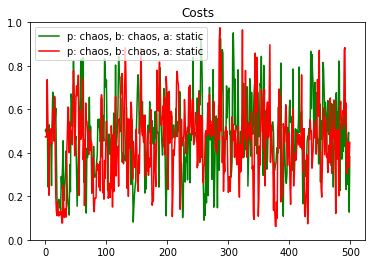

In [29]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()

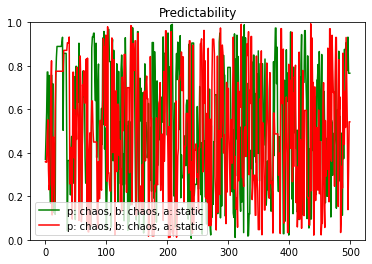

In [30]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()

#### Providing some predictive power
As you can see, the chaotic agents are chaotically updating and not reaching a behavioral equilibrium. The sigmoid agents below do reach an equilibrium, demonstrating that better predictions leads to you yourself becoming predictable, accelerating the process of error reduction via feedback. Here we can also see the impact of attention filtering on the costs.

In [31]:
world = World(state_size =50, time =500, agent=["base", "base"], seed=7, prediction=["sigmoid", "sigmoid"], behavior=["sigmoid","sigmoid"], attention=["entropy", "entropy"])

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#world.print_results()
time = [t for t in range(len(costs[0]))]

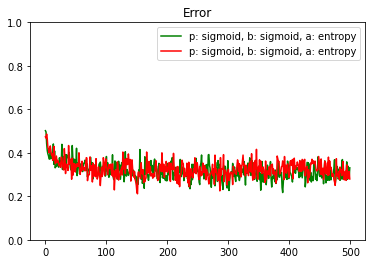

In [32]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

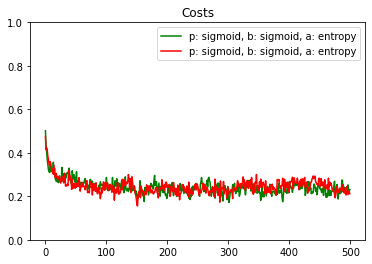

In [33]:

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()

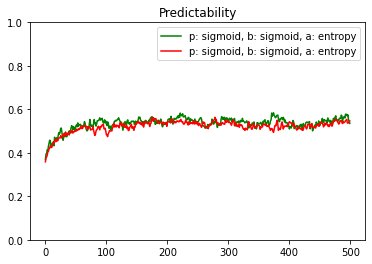

In [34]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()

#### Mixing
We can mix and match update methods for some interesting experiments.

In [35]:
world = World(state_size =50, time =500, agent=["base", "base"], prediction=["chaos", "sigmoid"], behavior=["chaos", "sigmoid"], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#world.print_results()
time = [t for t in range(len(costs[0]))]

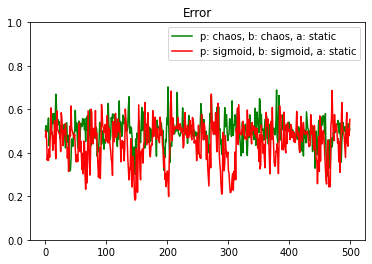

In [36]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

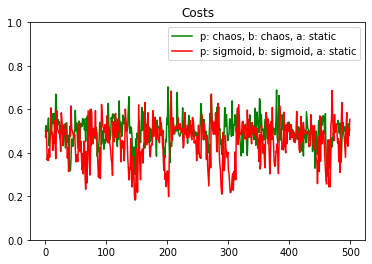

In [37]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()

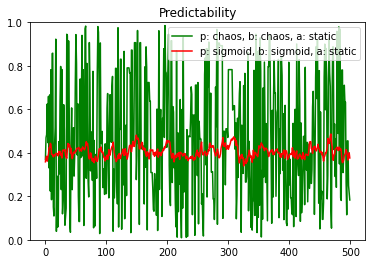

In [38]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()

In [39]:
world = World(state_size =50, time =500, agent=["base", "base"], prediction=["chaos", "sigmoid"], behavior=["sigmoid", "sigmoid"], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#world.print_results()
time = [t for t in range(len(costs[0]))]

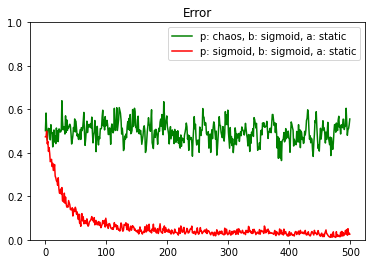

In [40]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

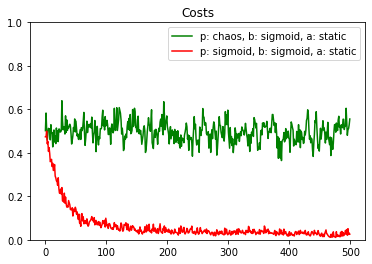

In [41]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()

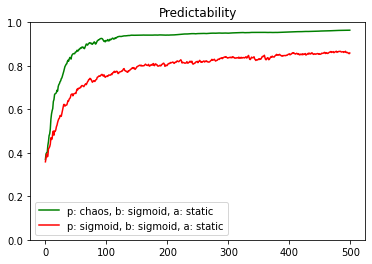

In [42]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()